# Factors that Led to Borrowers Receiving Huge Original Loan Amounts
## by Josephine Seyram Agyeman

## Investigation Overview

In this investigation, I was interested in the variables that would lead to borrowers receiving huge original loan amounts. The main focus was on the number of recommendations the borrowers had and their employment status

## Dataset Overview

The ProsperLoan Dataset contains various variables like term, recommendations, investors, original loan amount, occcupation, among others on approximately 110,000 loan borrowers. Seventy-two variables were dropped from the analysis as they were not important to the main findings in this investigation. 



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
 #Selecting columns that will be explored
loan = loan.loc[:, ['Term', 'LoanStatus', 'BorrowerState', 'Occupation', 'EmploymentStatus',
                       'LoanOriginalAmount',  'Recommendations', 'MonthlyLoanPayment', 'Investors']]
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
Term                  113937 non-null int64
LoanStatus            113937 non-null object
BorrowerState         108422 non-null object
Occupation            110349 non-null object
EmploymentStatus      111682 non-null object
LoanOriginalAmount    113937 non-null int64
Recommendations       113937 non-null int64
MonthlyLoanPayment    113937 non-null float64
Investors             113937 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 7.8+ MB


In [4]:
 #Changing the data types of some columns to catergories
loan['Occupation'] = loan['Occupation'].astype('category')
loan['BorrowerState'] = loan['BorrowerState'].astype('category')
loan['LoanStatus'] = loan['LoanStatus'].astype('category')
loan['EmploymentStatus'] = loan['EmploymentStatus'].astype('category')
loan['Term'] = loan['Term'].astype('category')
loan['Recommendations'] = loan['Recommendations'].astype('category')
loan['Investors'] = loan['Investors'].astype('category')

# VISUALIZATIONS
## Distribution of the Loan Original Amounts 

The Loan Original Amount given out in the dataset takes on a very large range of values, from 1,000 at the lowest to about 35,000 as the highest. Plotted on a logarithmic scale, the distribution of Loan Orignal Amount takes on a multimodal shape.

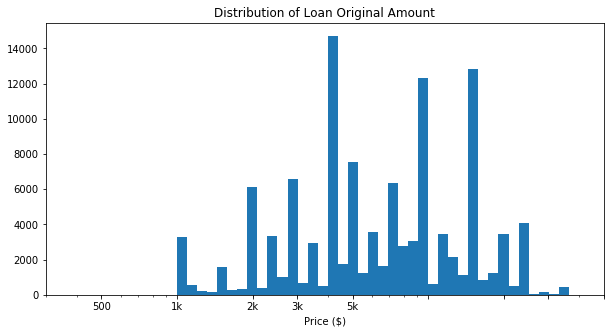

In [5]:
log_binsize = 0.040
bins = 10 ** np.arange(3, np.log10(loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan, x = 'LoanOriginalAmount', bins = bins)
plt.title('Distribution of Loan Original Amount')
plt.xscale('log') 
plt.xlim([300, 2e4])
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k'])
plt.xlabel('Price ($)')
plt.show()

## Distribution of Recommendations
Number of recommendations the borrower had at the time the listing was created. Most of the loans given out had no Recommendations.


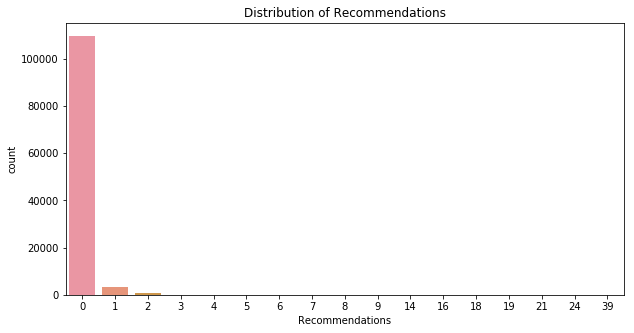

In [6]:
plt.figure(figsize=[10, 5])
sb.countplot(data=loan,x='Recommendations')
plt.title('Distribution of Recommendations');

## Distribution of Employment Status
The employment status of the borrower at the time they posted the listing. From the bar plot, most borrowers are employed


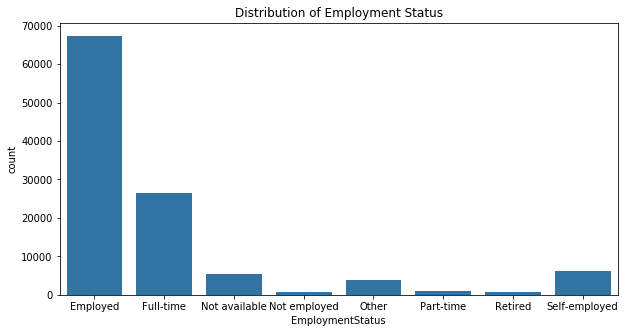

In [7]:
plt.figure(figsize=[10,5])
default_color = sb.color_palette()[0]
sb.countplot(data = loan, x = 'EmploymentStatus', color = default_color);
plt.title('Distribution of Employment Status');

## LoanOriginalAmount vs EmploymentStatus
The Employment Status of borrowers against the loan original amount they received. Those Employed received the largest loan orignal amount which is around $10,000

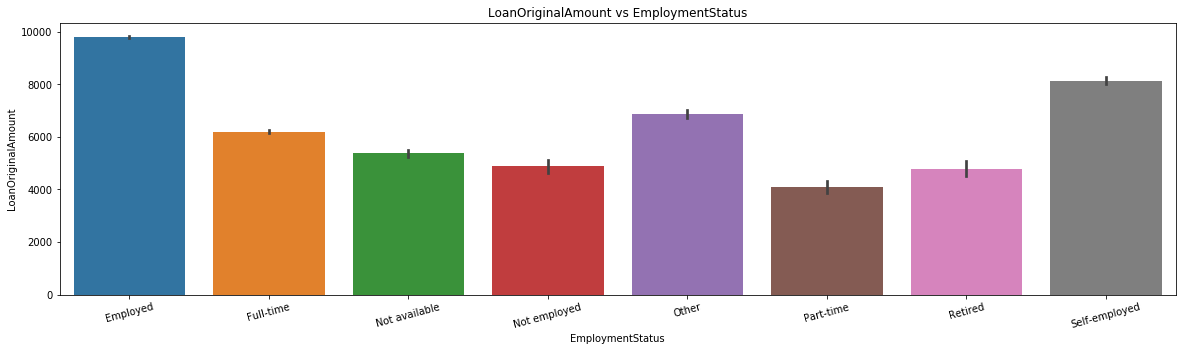

In [8]:
plt.figure(figsize = [20, 5])
sb.barplot(data=loan,y='LoanOriginalAmount',x='EmploymentStatus')
plt.xticks(rotation=15)
plt.title('LoanOriginalAmount vs EmploymentStatus');

## LoanOriginalAmount vs Recommendations
The average number of Recommendations borrowers had against the average loan original amount they received. The average amounts was used because of the large number of borrowers. Those with 21, 24 and 39 recommendations received more loans which was about $25,000.

In [9]:
#Findng the mean of the LoanOriginalAmount and the number of Recommendations
data = loan[['Recommendations','LoanOriginalAmount']]
data = data.groupby('Recommendations')['LoanOriginalAmount'].mean()
data

Recommendations
0      8383.879073
1      6969.317975
2      7912.802817
3      6762.370370
4      9194.038462
5      7536.428571
6      5025.000000
7      9466.600000
8     14000.000000
9     10830.000000
14    24000.000000
16     6750.000000
18     2430.000000
19     2000.000000
21    25000.000000
24    25000.000000
39    25000.000000
Name: LoanOriginalAmount, dtype: float64

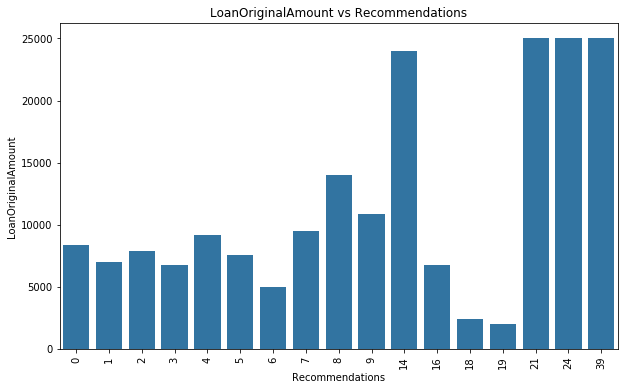

In [10]:
plt.figure(figsize = [10, 6])
sb.barplot(data=loan,x='Recommendations',y='LoanOriginalAmount',color=default_color,errwidth=False);
plt.xticks(rotation=90)
plt.title('LoanOriginalAmount vs Recommendations');

## Term vs LoanOriginalAmount vs LoanStatus

Taking into consideration Term as a variable of interest, from the barplot, borrowers received huge loans with the highest term of sixty (60). Most of those borrowers too had the 'completed' loan status. Borrowers on the sixty term received huge loan original amounts and have completed payment. 


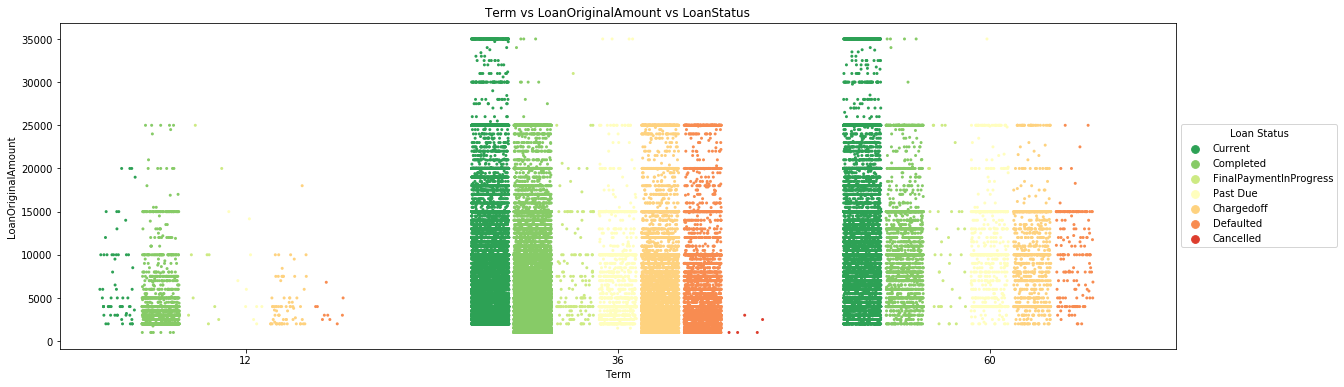

In [11]:
#adding a new column called and changing datatype to string
loan['LoanStatus_New']= loan['LoanStatus'].astype(str)
mask = loan['LoanStatus_New'].str.contains('Past Due')

#for all True rows,change value to 'Past Due'
loan.loc[mask,'LoanStatus_New'] = "Past Due"
status_order=['Current','Completed','FinalPaymentInProgress','Past Due','Chargedoff','Defaulted','Cancelled']
loan['LoanStatus_New'] = pd.Categorical(loan['LoanStatus_New'],status_order,ordered = True)

plt.figure(figsize=[20,6])
sb.stripplot(x='Term',y = 'LoanOriginalAmount', hue= 'LoanStatus_New',data=loan, size=3,jitter=0.35,dodge=True,palette="RdYlGn_r");
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),title='Loan Status')
plt.title('Term vs LoanOriginalAmount vs LoanStatus');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 367773 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/